## O Danych

Zbiór danych zawiera informacje o wyborach do Senatu w III RP.

Każdy wiersz w zbiorze danych reprezentuje daną partię polityczną



Kolumny:
* **ROK** - Rok wyborów
* **PARTIA** - Partia
* **SKROT** - Skrót partii w/w
* **POGLADY** - Poglądy partii według kategorii: Prawica, Centroprawica, Centrum, Centrolewica, Lewica
* **GLOSY** - Ile procent głosów otrzymała dana partia
* **MANDATY** - Ilość mandatów w Parlamencie III RP

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# Ogólny przegląd danych

In [68]:
df = pd.read_csv('Senat.csv', sep=';', encoding='iso-8859-2', engine='python')
df = df.applymap(lambda x: x.replace('\x9c', 'ś') if isinstance(x, str) else x)
df

,ROK,PARTIA,SKROT,POGLADY,GŁOSY,MANDATY
0,1991,Unia Demokratyczna,UD,Centrolewica,"16,42%",21
1,1991,"Niezależny Samorzšdny Zwišzek Zawodowy ""Solida...",NaN,Centrum,"9,68%",11
2,1991,Porozumienie Obywatelskie Centrum,NaN,Centroprawica,"9,04%",9
3,1991,Wyborcza Akcja Katolicka,NaN,Prawica,"8,78%",9
4,1991,Polskie Stronnictwo Ludowe,PSL,Centroprawica,"7,50%",8
...,...,...,...,...,...,...
201,2023,Ruch Dobrobytu i Pokoju,NaN,Centrolewica,"0,10%",Nie
202,2023,Ruch Naprawy Polski,RNP,Prawica,"0,07%",Nie
203,2023,Zjednoczeni,NaN,Prawica,"0,06%",Nie
204,2023,Normalny Kraj,NaN,Prawica,"0,01%",Nie


#### Widzimy że plik został wczytany, ale bez polskich znaków, zaraz to zmienię

In [69]:
df = df.replace({
    'ě': 'ż',
    '÷': 'ł',
    '': 'ś',
    '': 'ę',
    '': 'ś',
    'Ž': 'ż',
    '': 'ń',
    'ô': 'ó',
    '': 'ó',
    'ô': 'ę',
}, regex=True)
df

,ROK,PARTIA,SKROT,POGLADY,GŁOSY,MANDATY
0,1991,Unia Demokratyczna,UD,Centrolewica,"16,42%",21
1,1991,"Niezależny Samorzšdny Zwišzek Zawodowy ""Solida...",NaN,Centrum,"9,68%",11
2,1991,Porozumienie Obywatelskie Centrum,NaN,Centroprawica,"9,04%",9
3,1991,Wyborcza Akcja Katolicka,NaN,Prawica,"8,78%",9
4,1991,Polskie Stronnictwo Ludowe,PSL,Centroprawica,"7,50%",8
...,...,...,...,...,...,...
201,2023,Ruch Dobrobytu i Pokoju,NaN,Centrolewica,"0,10%",Nie
202,2023,Ruch Naprawy Polski,RNP,Prawica,"0,07%",Nie
203,2023,Zjednoczeni,NaN,Prawica,"0,06%",Nie
204,2023,Normalny Kraj,NaN,Prawica,"0,01%",Nie


In [70]:
df.loc[df['PARTIA'] == 'Prawo i Sprawiedliwo', 'PARTIA'] = 'Prawo i Sprawiedliwość'

### 5 losowych wartości

In [71]:
df. sample (5)

,ROK,PARTIA,SKROT,POGLADY,GŁOSY,MANDATY
14,1991,Konfederacja Komitetów Obywatelskich,NaN,Centroprawica,"0,40%",1
167,2019,Prawo i Sprawiedliwość,PIS,Centroprawica,"44,56%",48
138,2011,Cimoszewicz do Senatu,NaN,Lewica,"0,27%",1
131,2007,Inne,NaN,NaN,"3,10%",Nie
68,1997,Ruch Obudowy Polski,ROP,Prawica,"9,84%",5


### 5 pierwszych wartości

In [72]:
df. head (5)

,ROK,PARTIA,SKROT,POGLADY,GŁOSY,MANDATY
0,1991,Unia Demokratyczna,UD,Centrolewica,"16,42%",21
1,1991,"Niezależny Samorzšdny Zwišzek Zawodowy ""Solida...",NaN,Centrum,"9,68%",11
2,1991,Porozumienie Obywatelskie Centrum,NaN,Centroprawica,"9,04%",9
3,1991,Wyborcza Akcja Katolicka,NaN,Prawica,"8,78%",9
4,1991,Polskie Stronnictwo Ludowe,PSL,Centroprawica,"7,50%",8


### 5 ostatnich wartości

In [73]:
df.tail(5)

,ROK,PARTIA,SKROT,POGLADY,GŁOSY,MANDATY
201,2023,Ruch Dobrobytu i Pokoju,NaN,Centrolewica,"0,10%",Nie
202,2023,Ruch Naprawy Polski,RNP,Prawica,"0,07%",Nie
203,2023,Zjednoczeni,NaN,Prawica,"0,06%",Nie
204,2023,Normalny Kraj,NaN,Prawica,"0,01%",Nie
205,2023,Inne,NaN,NaN,"2,05%",Nie


### Aby potem było prościej w pokazywaniu wykresów, rozbiję kolumnę MANDATY na MANDATY TAK NIE i MANDATY ILOSC, a także GLOSY zamienię procenty na lczby i nazwę tę kolumnę GLOSY (%).

In [74]:
df['GLOSY (%)'] = df['GŁOSY'].str.replace(',', '.').str.replace('%', '').astype(float)

In [75]:
# Kopia oryginalnej kolumny
df['MANDATY ILOSC'] = df['MANDATY'].copy()

# Dodaję kolumnę logiczną: Czy partia była w Sejmie?
df['MANDATY TAK NIE'] = df['MANDATY'].apply(lambda x: x != 'Nie' and pd.notnull(x))
df

,ROK,PARTIA,SKROT,POGLADY,GŁOSY,MANDATY,GLOSY (%),MANDATY ILOSC,MANDATY TAK NIE
0,1991,Unia Demokratyczna,UD,Centrolewica,"16,42%",21,16.42,21,True
1,1991,"Niezależny Samorzšdny Zwišzek Zawodowy ""Solida...",NaN,Centrum,"9,68%",11,9.68,11,True
2,1991,Porozumienie Obywatelskie Centrum,NaN,Centroprawica,"9,04%",9,9.04,9,True
3,1991,Wyborcza Akcja Katolicka,NaN,Prawica,"8,78%",9,8.78,9,True
4,1991,Polskie Stronnictwo Ludowe,PSL,Centroprawica,"7,50%",8,7.50,8,True
...,...,...,...,...,...,...,...,...,...
201,2023,Ruch Dobrobytu i Pokoju,NaN,Centrolewica,"0,10%",Nie,0.10,Nie,False
202,2023,Ruch Naprawy Polski,RNP,Prawica,"0,07%",Nie,0.07,Nie,False
203,2023,Zjednoczeni,NaN,Prawica,"0,06%",Nie,0.06,Nie,True
204,2023,Normalny Kraj,NaN,Prawica,"0,01%",Nie,0.01,Nie,False


### Widzimy że kolumny GLOSY i MANDATY są nie potrzebne więc je usuwamy i zmienimy kolejność kolumn, przy okazji usunę także "Inne"  ze względu na to że jest to zbiór kilkudziesięciu innych komitetów wyborczych, które miały poparcie bliskie 0%.

In [76]:
df = df.drop(columns=['GŁOSY', 'MANDATY'])
df = df[df['PARTIA'] != 'Inne']

In [77]:
# Zmieńmy kolejność kolumn
df = df[['ROK','PARTIA','SKROT', 'POGLADY', 'GLOSY (%)', 'MANDATY TAK NIE', 'MANDATY ILOSC']]

# Jeśłi kolumna SKROT jest pusta do zostawmy "-"
df['SKROT'] = df['SKROT'].fillna('-')

# Zamieńmy w kolumnie MANDATY TAK NIE True na Tak, a False na Nie
df['MANDATY TAK NIE'] = df['MANDATY TAK NIE'].map({True: 'Tak', False: 'Nie'})

# Pozbyjmy się pustych miejsc w kolmnie POGLADY
df['POGLADY'] = df['POGLADY'].fillna('brak')

df

,ROK,PARTIA,SKROT,POGLADY,GLOSY (%),MANDATY TAK NIE,MANDATY ILOSC
0,1991,Unia Demokratyczna,UD,Centrolewica,16.42,Tak,21
1,1991,"Niezależny Samorzšdny Zwišzek Zawodowy ""Solida...",-,Centrum,9.68,Tak,11
2,1991,Porozumienie Obywatelskie Centrum,-,Centroprawica,9.04,Tak,9
3,1991,Wyborcza Akcja Katolicka,-,Prawica,8.78,Tak,9
4,1991,Polskie Stronnictwo Ludowe,PSL,Centroprawica,7.50,Tak,8
...,...,...,...,...,...,...,...
200,2023,Zwišzek Słowiański,ZS,Prawica,0.12,Tak,Nie
201,2023,Ruch Dobrobytu i Pokoju,-,Centrolewica,0.10,Nie,Nie
202,2023,Ruch Naprawy Polski,RNP,Prawica,0.07,Nie,Nie
203,2023,Zjednoczeni,-,Prawica,0.06,Tak,Nie


### Przyjrzyjmy się ogólnym informacjom o Date Frame

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 196 entries, 0 to 204
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ROK              196 non-null    int64  
 1   PARTIA           196 non-null    object 
 2   SKROT            196 non-null    object 
 3   POGLADY          196 non-null    object 
 4   GLOSY (%)        196 non-null    float64
 5   MANDATY TAK NIE  196 non-null    object 
 6   MANDATY ILOSC    196 non-null    object 
dtypes: float64(1), int64(1), object(5)
memory usage: 12.2+ KB


# Analiza brakujących wartości

In [79]:
df.isnull().sum()

ROK                0
PARTIA             0
SKROT              0
POGLADY            0
GLOSY (%)          0
MANDATY TAK NIE    0
MANDATY ILOSC      0
dtype: int64

##### Nie ma brakujących wartości

# Analiza pojedynczych zmiennych

In [80]:
df['ROK'].min(), df['ROK'].max()

(1991, 2023)

##### Pierwszym rokiem badania jest 1991 czyli pierwsze w pełni wolne wybory, a ostatnim 2023

In [81]:
df['PARTIA'].value_counts(dropna=False).head()

Mniejszość Niemiecka            10
Polskie Stronnictwo Ludowe       9
Prawo i Sprawiedliwość           6
Sojusz Lewicy Demokratycznej     6
Samoobrona                       6
Name: PARTIA, dtype: int64

##### Najwięcej bo 10 razy Mniejszość Niemiecka startowała do polskiego Senatu.

In [82]:
df['POGLADY'].value_counts(dropna=False)

Centroprawica    56
Centrum          42
Prawica          41
Lewica           36
Centrolewica     21
Name: POGLADY, dtype: int64

##### Najwięcej partii bo aż 56 miało poglądy centroprawicowe, na drugim miejscu są partie o poglądach centrum(42), podium zamykają partie o poglądach prawicowych (41).

### Przyjrzyjmy się partiom, które dostały się do Senatu.

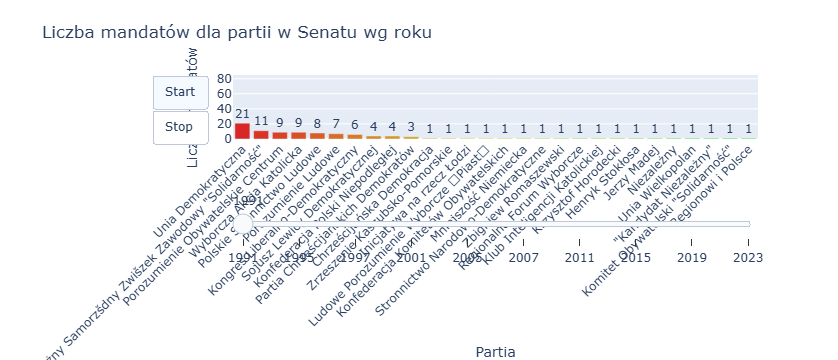

In [84]:
# Filtrowanie partii, które dostały się do Sejmu
df_sejm = df[df["MANDATY TAK NIE"] == "Tak"].copy()

# Konwersja kolumny 'MANDATY ILOSC' na liczby (int lub float)
df_sejm["MANDATY ILOSC"] = pd.to_numeric(df_sejm["MANDATY ILOSC"], errors='coerce')

# Lista unikalnych lat i partii
years = sorted(df_sejm["ROK"].unique())
partie = df_sejm["PARTIA"].unique()

# Kolory dla partii (opcjonalnie — przypisane ręcznie lub losowo)
colors = {
    partia: f"hsl({i * 360 / len(partie)}, 70%, 50%)"
    for i, partia in enumerate(partie)
}

# Inicjalizacja figury
fig = go.Figure()

# Dodanie pierwszego roku jako domyślnego widoku
initial_year = years[0]
df_initial = df_sejm[df_sejm["ROK"] == initial_year]

fig.add_trace(go.Bar(
    x=df_initial["PARTIA"],
    y=df_initial["MANDATY ILOSC"],
    marker_color=[colors[p] for p in df_initial["PARTIA"]],
    text=df_initial["MANDATY ILOSC"],
    textposition='outside',
    name=str(initial_year)
))

# Przygotowanie ramek animacji
frames = []
steps = []

for year in years:
    df_year = df_sejm[df_sejm["ROK"] == year]
    frame = go.Frame(
        data=[go.Bar(
            x=df_year["PARTIA"],
            y=df_year["MANDATY ILOSC"],
            marker_color=[colors[p] for p in df_year["PARTIA"]],
            text=df_year["MANDATY ILOSC"],
            textposition='outside'
        )],
        name=str(year)
    )
    frames.append(frame)

    step = dict(
        method="animate",
        args=[[str(year)], {
            "mode": "immediate",
            "frame": {"duration": 500, "redraw": True},
            "transition": {"duration": 300}
        }],
        label=str(year)
    )
    steps.append(step)

# Dodanie ramek animacji do figury
fig.frames = frames

# Layout wykresu
fig.update_layout(
    title="Liczba mandatów dla partii w Senatu wg roku",
    xaxis_title="Partia",
    yaxis_title="Liczba mandatów",
    xaxis_tickangle=-45,
    yaxis=dict(range=[0, df_sejm["MANDATY ILOSC"].max() + 10]),
    sliders=[{
        "active": 0,
        "pad": {"t": 50},
        "steps": steps
    }],
    updatemenus=[{
        "type": "buttons",
        "buttons": [
            {"label": "Start", "method": "animate", "args": [None, {
                "frame": {"duration": 1000, "redraw": True},
                "fromcurrent": True,
                "transition": {"duration": 500}
            }]},
            {"label": "Stop", "method": "animate", "args": [[None], {
                "frame": {"duration": 0, "redraw": False},
                "mode": "immediate",
                "transition": {"duration": 0}
            }]}
        ]
    }],
    showlegend=False
)

fig.show()

### Rekord posiadanych mandatów należy do SLD-UP w latach 2001-2005 (75 mandatów). Najdłużej w Senacie była partia: Polskie Stronnictwo Ludowe bo aż 8 kadencji. Od 2001 roku w Senacie obecne są dwie największe partie polityczne: Platforma Obywatelska oraz Prawo i Sprawiedliwość. Najwięcej partii było w Senacie w latach 1991-1993 bo aż 28 partii i koitetów wyborczych. A najmniej w 2007-2011 (3 partii/komitety). Od 2007 do 2023 roku w Senacie rządziły praktycznie tylko dwie partie: PO oraz PIS. 

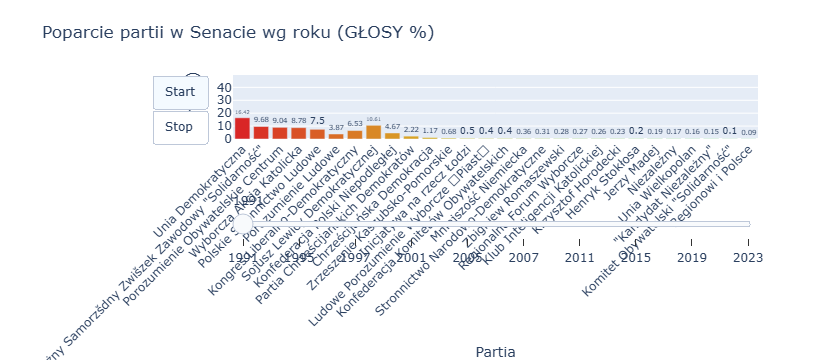

In [88]:
# Filtrowanie partii, które dostały się do Senatu
df_sejm = df[df["MANDATY TAK NIE"] == "Tak"].copy()

# Konwersja kolumny 'GLOSY (%)' na liczby (float)
df_sejm["GLOSY (%)"] = pd.to_numeric(df_sejm["GLOSY (%)"], errors='coerce')

# Lista unikalnych lat i partii
years = sorted(df_sejm["ROK"].unique())
partie = df_sejm["PARTIA"].unique()

# Kolory dla partii (przypisane na podstawie indeksu)
colors = {
    partia: f"hsl({i * 360 / len(partie)}, 70%, 50%)"
    for i, partia in enumerate(partie)
}

# Inicjalizacja wykresu
fig = go.Figure()

# Dodanie pierwszego roku jako domyślnego widoku
initial_year = years[0]
df_initial = df_sejm[df_sejm["ROK"] == initial_year]

fig.add_trace(go.Bar(
    x=df_initial["PARTIA"],
    y=df_initial["GLOSY (%)"],
    marker_color=[colors[p] for p in df_initial["PARTIA"]],
    text=df_initial["GLOSY (%)"].round(2),
    textposition='outside',
    name=str(initial_year)
))

# Przygotowanie ramek animacji
frames = []
steps = []

for year in years:
    df_year = df_sejm[df_sejm["ROK"] == year]
    frame = go.Frame(
        data=[go.Bar(
            x=df_year["PARTIA"],
            y=df_year["GLOSY (%)"],
            marker_color=[colors[p] for p in df_year["PARTIA"]],
            text=df_year["GLOSY (%)"].round(2),
            textposition='outside'
        )],
        name=str(year)
    )
    frames.append(frame)

    step = dict(
        method="animate",
        args=[[str(year)], {
            "mode": "immediate",
            "frame": {"duration": 500, "redraw": True},
            "transition": {"duration": 300}
        }],
        label=str(year)
    )
    steps.append(step)

# Dodanie ramek animacji do figury
fig.frames = frames

# Layout wykresu
fig.update_layout(
    title="Poparcie partii w Senacie wg roku (GŁOSY %)",
    xaxis_title="Partia",
    yaxis_title="Głosy (%)",
    xaxis_tickangle=-45,
    yaxis=dict(range=[0, df_sejm["GLOSY (%)"].max() + 5]),
    sliders=[{
        "active": 0,
        "pad": {"t": 50},
        "steps": steps
    }],
    updatemenus=[{
        "type": "buttons",
        "buttons": [
            {"label": "Start", "method": "animate", "args": [None, {
                "frame": {"duration": 1000, "redraw": True},
                "fromcurrent": True,
                "transition": {"duration": 500}
            }]},
            {"label": "Stop", "method": "animate", "args": [[None], {
                "frame": {"duration": 0, "redraw": False},
                "mode": "immediate",
                "transition": {"duration": 0}
            }]}
        ]
    }],
    showlegend=False
)

fig.show()

### Największe poparcie miało Prawo i Sprawiedliwość w roku 2019 (44,56%), a najmniejsze poparcie miała partia Zjednoczeni w 1991 roku (0,06%)

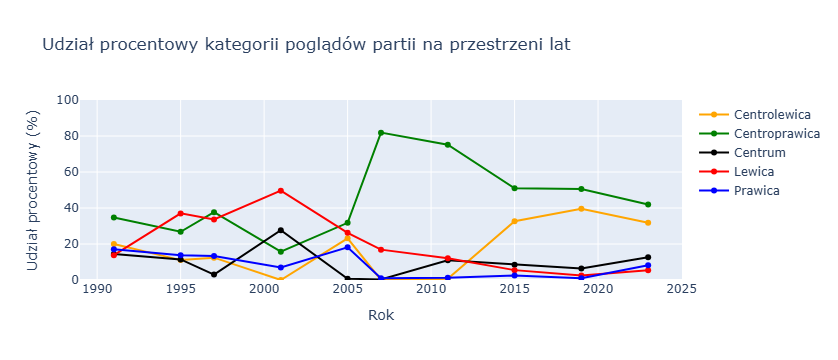

In [89]:
# Konwersja kolumny 'GLOSY (%)' do liczby (float)
df["GLOSY (%)"] = pd.to_numeric(df["GLOSY (%)"], errors='coerce')

# Grupujemy dane: suma procentowego poparcia (GLOSY (%)) wg roku i kategorii poglądów
df_grouped = df.groupby(["ROK", "POGLADY"])["GLOSY (%)"].sum().reset_index()

# Suma procentowego poparcia w każdym roku (powinna być około 100)
rok_sumy = df_grouped.groupby("ROK")["GLOSY (%)"].sum().reset_index().rename(columns={"GLOSY (%)": "SUMA_ROK"})

# Dołączamy sumę do df_grouped
df_grouped = df_grouped.merge(rok_sumy, on="ROK")

# Obliczamy udział procentowy danej kategorii w roku (normalizacja)
df_grouped["UDZIAL_PROC"] = (df_grouped["GLOSY (%)"] / df_grouped["SUMA_ROK"]) * 100

# Listy lat i kategorii poglądów
years = sorted(df_grouped["ROK"].unique())
categories = df_grouped["POGLADY"].unique()

# Kolory dla kategorii (możesz zmienić według upodobań)
colors = {
    "Prawica": "blue",
    "Centroprawica": "green",
    "Centrum": "black",
    "Centrolewica": "orange",
    "Lewica": "red"
}

# Tworzymy wykres liniowy
fig = go.Figure()

for cat in categories:
    y_values = []
    for year in years:
        val = df_grouped[(df_grouped["ROK"] == year) & (df_grouped["POGLADY"] == cat)]["UDZIAL_PROC"]
        y_values.append(val.values[0] if not val.empty else 0)

    fig.add_trace(go.Scatter(
        x=years,
        y=y_values,
        mode='lines+markers',
        name=cat,
        line=dict(color=colors.get(cat, "gray"))
    ))

# Layout wykresu
fig.update_layout(
    title="Udział procentowy kategorii poglądów partii na przestrzeni lat",
    xaxis_title="Rok",
    yaxis_title="Udział procentowy (%)",
    yaxis=dict(range=[0, 100]),
    hovermode="x unified"
)

fig.show()

### W 2007 roku centroprawica cieszyła się najwyższym - 81,87% - poparciem. Najgorsze poparcie miały poglądy centrolewicowe w 2001 i 2007 roku (0%). Prawica od 2007 do 2019 praktycznie nie istniała na scenie politycznej, podobnie jak centrum od 2005 do 2007.
### Najlepsze i najgorsze wyniki poszczególnych poglądów:
##### - prawica: najlepszy: rok 1991 - 17,02%; najgorszy: rok 2007 - 0,93%
##### - centroprawica: najlepszy: rok 2007 - 81,87%; najgorszy: rok 2001 - 15,71%
##### - centrum: najlepszy: rok 2001 - 27,64%; najgorszy: rok 2007 - 0,33%
##### - centrolewica: najlepszy: rok 2019 - 39,53%; najgorszy: rok 2001 - 0%
##### - lewica: najlepszy: rok 2001 - 49,65%; najgorszy: rok 2019 - 2,46%

# Sprawdzanie korelacji między zmiennymi

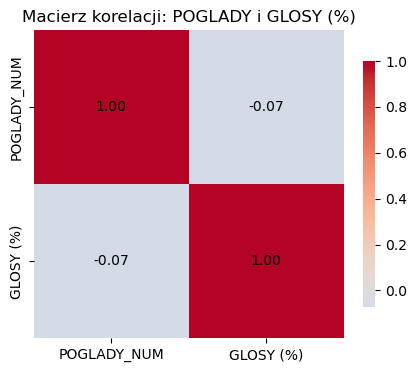

In [90]:
# Mapowanie 'POGLADY' na wartości numeryczne
poglady_map = {
    "Prawica": 4,
    "Centroprawica": 3,
    "Centrum": 2,
    "Centrolewica": 1,
    "Lewica": 0
}
df["POGLADY_NUM"] = df["POGLADY"].map(poglady_map)

# Konwersja 'GLOSY (%)' na numeryczne
df["GLOSY (%)"] = pd.to_numeric(df["GLOSY (%)"], errors='coerce')

# Wybór kolumn do korelacji
cols = ["POGLADY_NUM", "GLOSY (%)"]
corr_df = df[cols].dropna()

# Obliczenie macierzy korelacji
corr_matrix = corr_df.corr()

# Wizualizacja korelacji
plt.figure(figsize=(5,4))
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap="coolwarm",
    center=0,
    fmt=".2f",
    annot_kws={"color": "black"},
    cbar_kws={"shrink": 0.8}
)
plt.title("Macierz korelacji: POGLADY i GLOSY (%)")
plt.show()

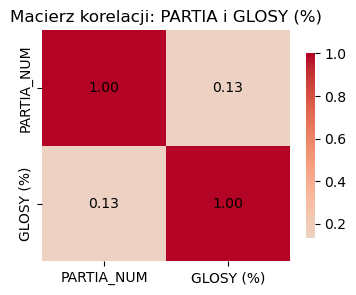

In [91]:
# Zamiana PARTIA na numeryczne kody
df["PARTIA_NUM"] = df["PARTIA"].astype('category').cat.codes

# Konwersja GLOSY (%) na liczby
df["GLOSY (%)"] = pd.to_numeric(df["GLOSY (%)"], errors='coerce')

# Wybieramy kolumny i usuwamy NaN
corr_df = df[["PARTIA_NUM", "GLOSY (%)"]].dropna()

# Obliczamy korelację
corr_matrix = corr_df.corr()

# Rysujemy heatmapę
plt.figure(figsize=(4,3))
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap="coolwarm",
    center=0,
    fmt=".2f",
    annot_kws={"color": "black"},
    cbar_kws={"shrink": 0.8}
)
plt.title("Macierz korelacji: PARTIA i GLOSY (%)")
plt.show()

### Nie widać zależności ani między poglądami a głosami, ani między partią a procentami głosów.

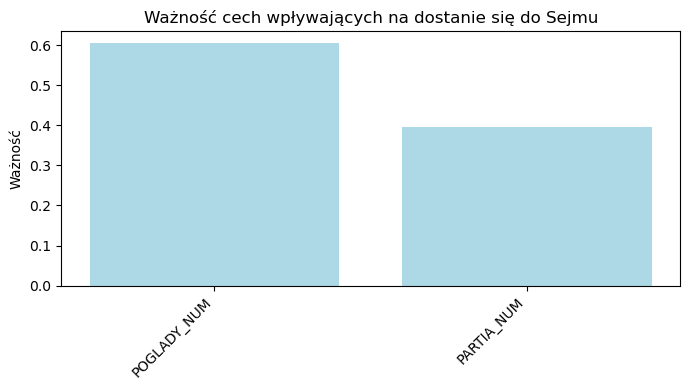

In [92]:
# Kodowanie POGLADY i PARTIA
le_poglady = LabelEncoder()
df['POGLADY_NUM'] = le_poglady.fit_transform(df['POGLADY'].astype(str))

le_partia = LabelEncoder()
df['PARTIA_NUM'] = le_partia.fit_transform(df['PARTIA'].astype(str))

# Tworzymy zmienną celu: 1 jeśli partia dostała się do Sejmu, 0 jeśli nie
df['MANDATY_TAK_NIE_NUM'] = df['MANDATY TAK NIE'].apply(lambda x: 1 if x == 'Tak' else 0)

# Wybieramy cechy i usuwamy wiersze z brakami
X = df[['POGLADY_NUM', 'PARTIA_NUM']].dropna()
y = df.loc[X.index, 'MANDATY_TAK_NIE_NUM']

# Podział na train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Trening drzewa decyzyjnego
model_tree = DecisionTreeClassifier(max_depth=3, random_state=42)
model_tree.fit(X_train, y_train)

# Ważność cech
importances = model_tree.feature_importances_
features = X.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(7,4))
plt.title("Ważność cech wpływających na dostanie się do Sejmu")
plt.bar(range(len(importances)), importances[indices], color='lightblue', align='center')
plt.xticks(range(len(importances)), features[indices], rotation=45, ha='right')
plt.ylabel("Ważność")
plt.tight_layout()
plt.show()

### Na wykresie widać, że najważniejszą cechą, dostania się do Senatu są poglądy.

In [1]:
!jupyter nbconvert Senat.ipynb --to html --no-input --no-prompt --output Senat.html > null 2>&1